<a href="https://colab.research.google.com/github/JungyuBaeck/ASTRON5205/blob/main/Week_02_NASA_Exoplanet_Team_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# tab = astropy.io.ascii.read("/content/drive/My Drive/Colab Notebooks/PS_2020.12.15_09.21.06.csv") # For 2020
tab = astropy.io.ascii.read("/content/drive/My Drive/Colab Notebooks/PS_2025.01.21_06.31.16.csv") # For 2025



In [ ]:
# This is to print out the names of all columns in the table
tab.colnames

['pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_radlim',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_met',
 'st_me

In [ ]:
np.unique(tab["discoverymethod"])

<Column name='discoverymethod' dtype='str29' length=11>
                   Astrometry
              Disk Kinematics
    Eclipse Timing Variations
                      Imaging
                 Microlensing
Orbital Brightness Modulation
                Pulsar Timing
  Pulsation Timing Variations
              Radial Velocity
                      Transit
    Transit Timing Variations

<ipython-input-43-586eaf0f834d>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


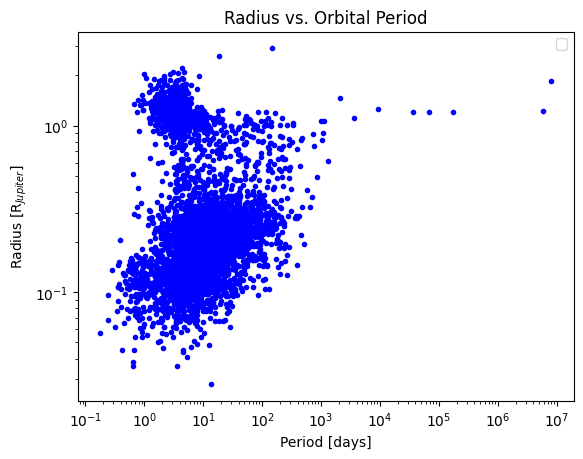

In [ ]:
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.title("Radius vs. Orbital Period")
plt.legend()

<ipython-input-44-39c4d33d544a>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


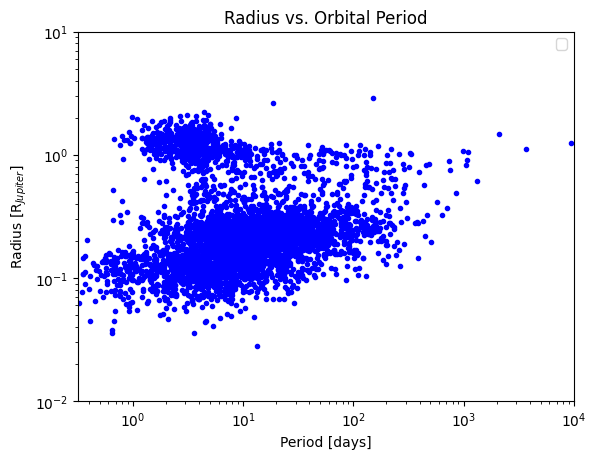

In [ ]:
# The above figure has too large a range for both x and y axis.
##For example, there are planets with sizes larger than 10 times jupier radii, which is not physical.
##Also, we are interested in planets on relative short orbital periods, so we will adjust the plot range
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(4))
plt.ylim(10**(-2), 10**(1))
plt.title("Radius vs. Orbital Period")
plt.legend()

<ipython-input-45-6e9eefa3c6ce>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


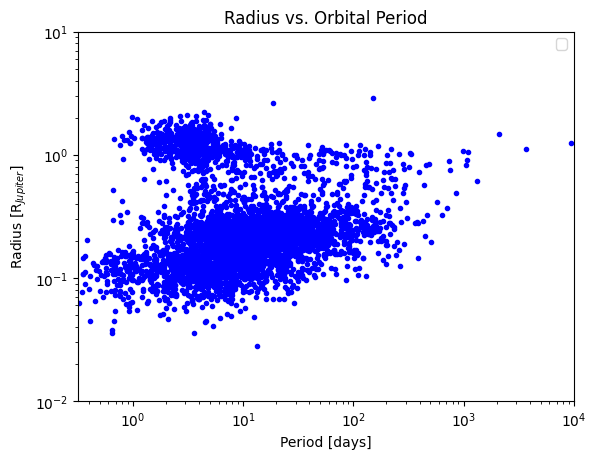

In [ ]:
# Do you notice the streaks like rain dropping from a cloud of exoplanets? That is because of multiple entries for the same system.
# The following selection (similar to you putting in 1 for the "default_flag" in view the online table at NASA Exoplanet Archive)

ind = np.where(tab["default_flag"] == 1)

plt.plot(tab["pl_orbper"][ind], tab["pl_radj"][ind], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(4))
plt.ylim(10**(-2), 10**(1))
plt.title("Radius vs. Orbital Period")
plt.legend()

(0.01, 10)

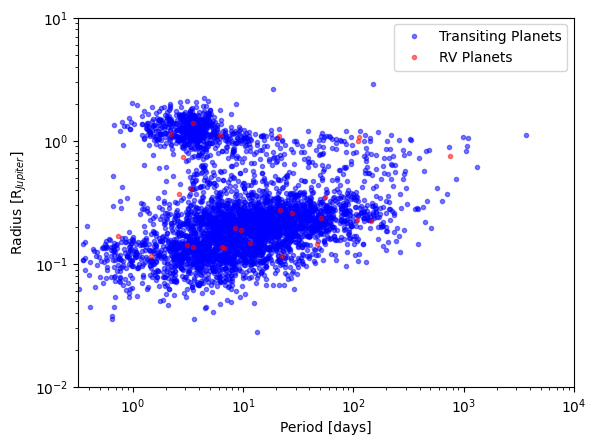

In [ ]:
ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Transit"))
plt.plot(tab["pl_orbper"][ind], tab["pl_radj"][ind], "b.", label="Transiting Planets", alpha=0.5)

ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Radial Velocity"))
plt.plot(tab["pl_orbper"][ind], tab["pl_radj"][ind], "r.", label="RV Planets", alpha=0.5)

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(4))
plt.ylim(10**(-2), 10**(1))


## Now you start to see the exoplanets are dryer and a clearer separation between the gas giant planet population and smaller planets.

## 1, How about Mass-Period plot, Mass-Semi-major axis plot, etc? How different are they and why?


<ipython-input-47-06366d3a0592>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


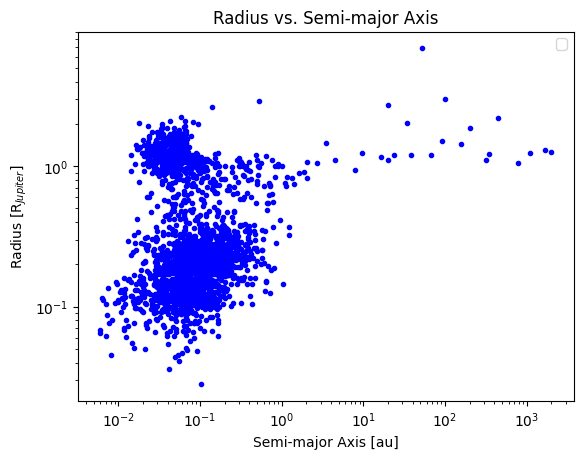

In [ ]:
plt.plot(tab["pl_orbsmax"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.title("Radius vs. Semi-major Axis")
plt.legend()


<ipython-input-80-20f3bd70e1ce>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


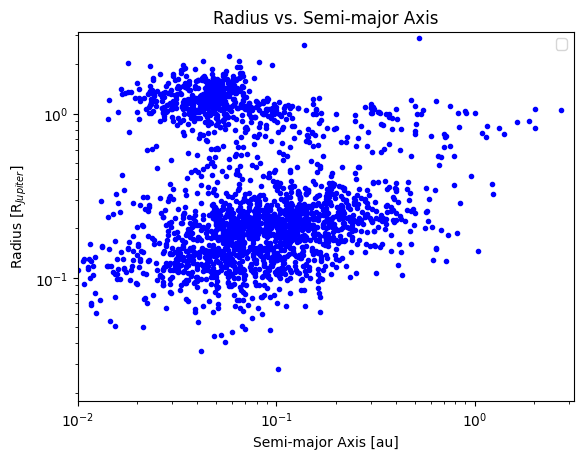

In [ ]:
ind = np.where(tab["default_flag"] == 1) # We put 1 in default flag before download. So same plotting

plt.plot(tab["pl_orbsmax"][ind], tab["pl_radj"][ind], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-2), 10**(0.5))
plt.ylim(10**(-1.75), 10**(0.5))
plt.title("Radius vs. Semi-major Axis")
plt.legend()

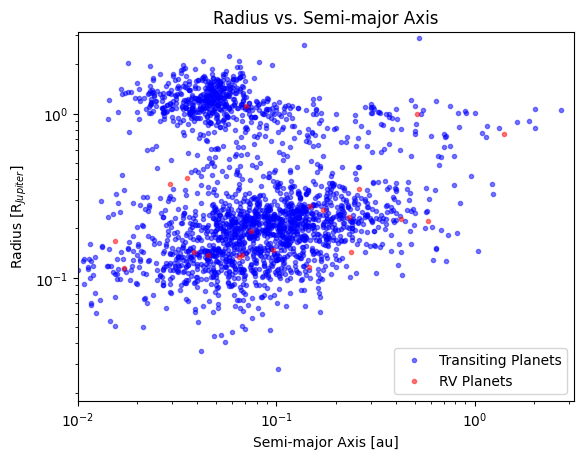

In [ ]:
ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Transit"))
plt.plot(tab["pl_orbsmax"][ind], tab["pl_radj"][ind], "b.", label="Transiting Planets", alpha=0.5)

ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Radial Velocity"))
plt.plot(tab["pl_orbsmax"][ind], tab["pl_radj"][ind], "r.", label="RV Planets", alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-2), 10**(0.5))
plt.ylim(10**(-1.75), 10**(0.5))
plt.title("Radius vs. Semi-major Axis")
plt.legend()

<ipython-input-50-11030cab6db4>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


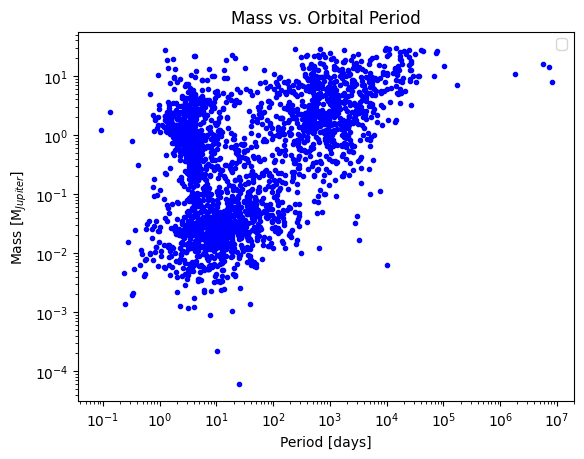

In [ ]:
plt.plot(tab["pl_orbper"], tab["pl_bmassj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.title("Mass vs. Orbital Period")
plt.legend()

<ipython-input-51-1123988c350a>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


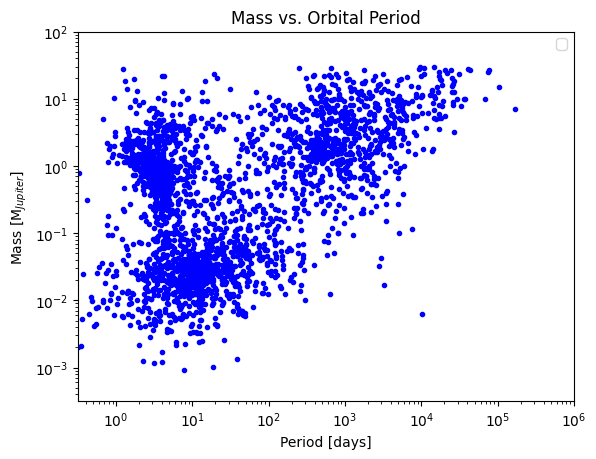

In [ ]:
plt.plot(tab["pl_orbper"], tab["pl_bmassj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(6))
plt.ylim(10**(-3.5), 10**(2))
plt.title("Mass vs. Orbital Period")
plt.legend()

<ipython-input-52-eb7aa3b314b2>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


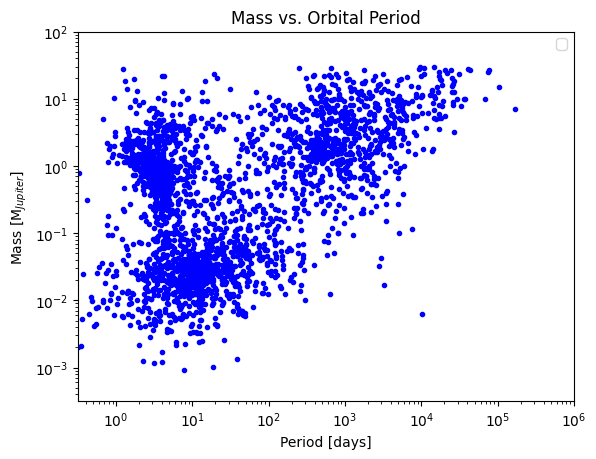

In [ ]:
ind = np.where(tab["default_flag"] == 1) # We put 1 in default flag before download. So same plotting.

plt.plot(tab["pl_orbper"][ind], tab["pl_bmassj"][ind], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(6))
plt.ylim(10**(-3.5), 10**(2))
plt.title("Mass vs. Orbital Period")
plt.legend()

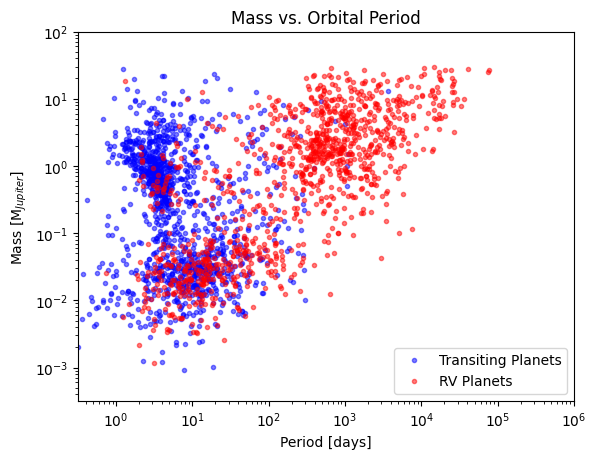

In [ ]:
ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Transit"))
plt.plot(tab["pl_orbper"][ind], tab["pl_bmassj"][ind], "b.", label="Transiting Planets", alpha=0.5)

ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Radial Velocity"))
plt.plot(tab["pl_orbper"][ind], tab["pl_bmassj"][ind], "r.", label="RV Planets", alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(6))
plt.ylim(10**(-3.5), 10**(2))
plt.title("Mass vs. Orbital Period")
plt.legend()

<ipython-input-54-bf9f1441825b>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


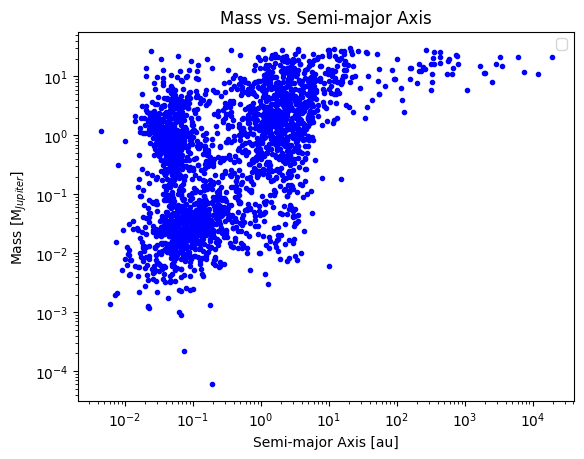

In [ ]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmassj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.title("Mass vs. Semi-major Axis")
plt.legend()


<ipython-input-55-1be746ce1307>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


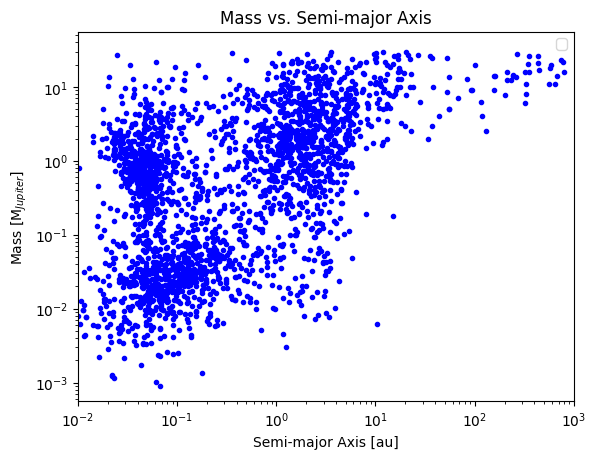

In [ ]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmassj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.xlim(10**(-2), 10**(3))
plt.ylim(10**(-3.25), 10**(1.75))
plt.title("Mass vs. Semi-major Axis")
plt.legend()

<ipython-input-56-03c1c563bee8>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


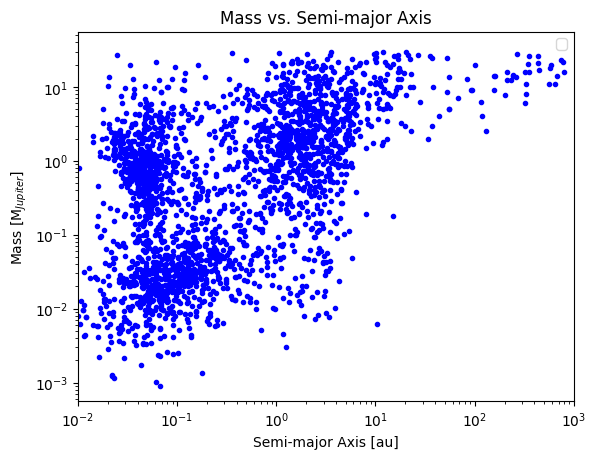

In [ ]:
ind = np.where(tab["default_flag"] == 1) # We put 1 in default flag before download. So same plotting.

plt.plot(tab["pl_orbsmax"][ind], tab["pl_bmassj"][ind], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.xlim(10**(-2), 10**(3))
plt.ylim(10**(-3.25), 10**(1.75))
plt.title("Mass vs. Semi-major Axis")
plt.legend()

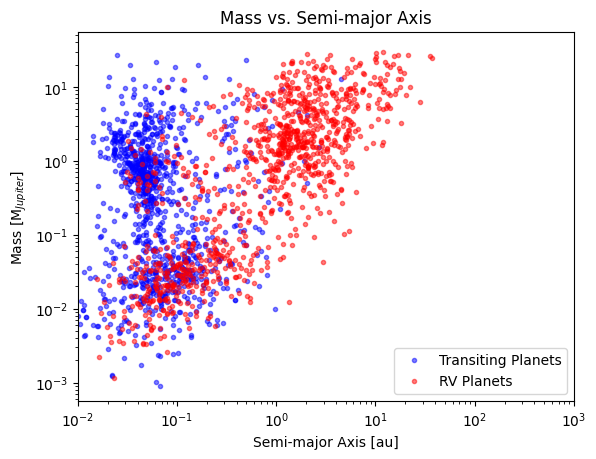

In [ ]:
ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Transit"))
plt.plot(tab["pl_orbsmax"][ind], tab["pl_bmassj"][ind], "b.", label="Transiting Planets", alpha=0.5)
""

ind = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"] == "Radial Velocity"))
plt.plot(tab["pl_orbsmax"][ind], tab["pl_bmassj"][ind], "r.", label="RV Planets", alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")
plt.xlim(10**(-2), 10**(3))
plt.ylim(10**(-3.25), 10**(1.75))
plt.title("Mass vs. Semi-major Axis")
plt.legend()

## 2, Overplot solar system planets on the above plot?

In [ ]:
# Solar system data (approximate values)
solar_system_planets = {
    'Mercury': {'mass': 0.00017, 'radius': 0.036, 'period': 88, 'semi_major_axis': 0.39},
    'Venus': {'mass': 0.00256, 'radius': 0.095, 'period': 225, 'semi_major_axis': 0.72},
    'Earth': {'mass': 0.000315, 'radius': 0.089, 'period': 365.25, 'semi_major_axis': 1.0},
    'Mars': {'mass': 0.000064, 'radius': 0.053, 'period': 687, 'semi_major_axis': 1.52},
    'Jupiter': {'mass': 1.0, 'radius': 1.0, 'period': 4333, 'semi_major_axis': 5.20},
    'Saturn': {'mass': 0.3, 'radius': 0.94, 'period': 10759, 'semi_major_axis': 9.54},
    'Uranus': {'mass': 0.046, 'radius': 0.39, 'period': 30687, 'semi_major_axis': 19.2},
    'Neptune': {'mass': 0.054, 'radius': 0.38, 'period': 60190, 'semi_major_axis': 30.05}
}

# Extract data for plotting
solar_system_radius = [planet_data['radius'] for planet_data in solar_system_planets.values()]
solar_system_periods = [planet_data['period'] for planet_data in solar_system_planets.values()]
solar_system_masses = [planet_data['mass'] for planet_data in solar_system_planets.values()]
solar_system_semi_major_axis = [planet_data['semi_major_axis'] for planet_data in solar_system_planets.values()]


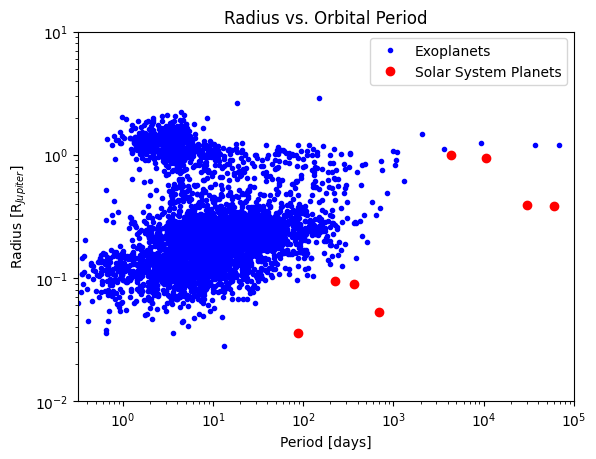

In [ ]:
#radius vs period
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b." , label="Exoplanets")
plt.plot(solar_system_periods, solar_system_radius , 'ro', label="Solar System Planets")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**(5))
plt.ylim(10**(-2), 10**(1))
plt.title("Radius vs. Orbital Period")
plt.legend()

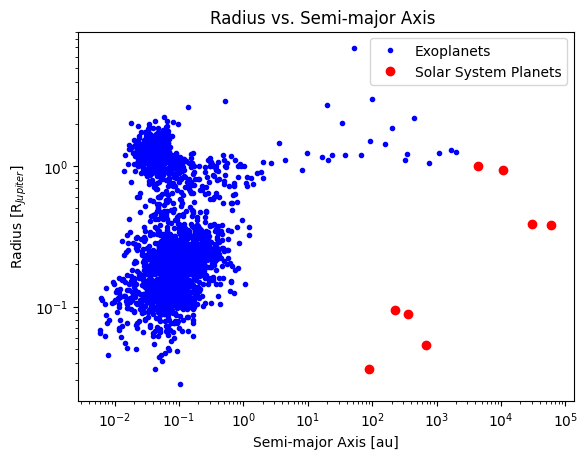

In [ ]:
# radius vs semi-major axis
plt.plot(tab["pl_orbsmax"], tab["pl_radj"], "b." , label="Exoplanets")
plt.plot(solar_system_periods, solar_system_radius , 'ro', label="Solar System Planets")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.title("Radius vs. Semi-major Axis ")
plt.legend()

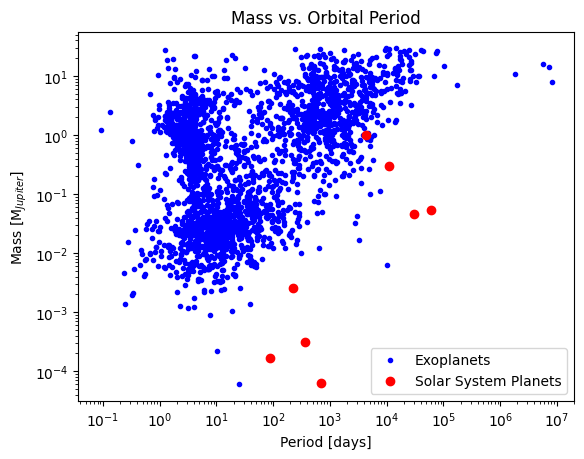

In [ ]:
# mass vs period
plt.plot(tab["pl_orbper"], tab["pl_bmassj"], "b." , label="Exoplanets")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")

# Overplot solar system planets
plt.plot(solar_system_periods, solar_system_masses, "ro", label="Solar System Planets")

plt.title("Mass vs. Orbital Period")
plt.legend()

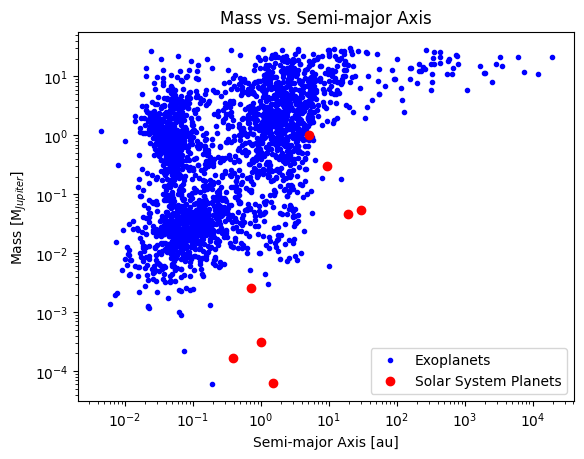

In [ ]:
# Plot exoplanet data (Mass vs. Semi-major axis)
plt.plot(tab["pl_orbsmax"], tab["pl_bmassj"], "b." , label="Exoplanets")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axis [au]")
plt.ylabel(r"Mass [M$_{Jupiter}$]")

# Overplot solar system planets
plt.plot(solar_system_semi_major_axis, solar_system_masses, 'ro', label='Solar System Planets')
plt.title("Mass vs. Semi-major Axis")
plt.legend()

## $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

## Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

## $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

## For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 0.5 solar mass:

In [ ]:
import astropy.constants as ac
import astropy.units as u

In [ ]:
sma_arr = 10.0**(np.arange(5)-2) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))



Text(0, 0.5, 'Mass [R$_{Earth}$]')

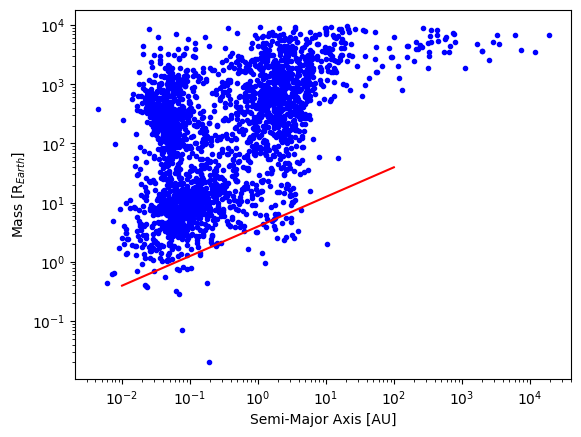

In [ ]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "b.")
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [R$_{Earth}$]")

## You may think about the conversin between mass and radius  when considering the sensitivity of other detection techniques.